In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
# Loading the data and stating empty string as NaN
data=pd.read_csv("data_vis_test.csv",na_values=[" "])

In [3]:
#Data preprocessing

In [4]:
# checking if the data contains any NULL or NA values
data.isnull().any().any()

True

In [5]:
#how many NA values we have in the data set
data.isnull().values.sum()

624

In [6]:
#each column has how many nA Values
data.isnull().sum()

user_id                          2
first_open_timestamp_micros      5
mobile_brand_name              617
device_model                     0
dtype: int64

In [7]:
#reading the top 20 values
data.head(20)

,user_id,first_open_timestamp_micros,mobile_brand_name,device_model
0,59742df346ab8ae80d7320e5,1.509256e+15,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,1.506950e+15,Xiaomi,Redmi 4A
2,59c8671a625fbbd425d735ae,1.506306e+15,NaN,Swipe_Elite_3
3,591ff88228d8f8c86bfd75bf,1.506840e+15,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,1.509862e+15,Sony,C6902
5,59f13874bb299b692aeef502,1.508981e+15,Samsung,SM-J700F
6,59d4f647bb299b692add0d24,1.506858e+15,NaN,OctaOne_5
7,59d8bafdfc67610b4500232b,1.506883e+15,Xiaomi,Redmi Note 4
8,59cc674efc67610b45f1c83b,1.506568e+15,Xiaomi,Redmi Note 4
9,58b072b134182301374ff77d,1.506420e+15,Vivo,vivo Y51L


In [8]:
# renaming the column name for better understanding
data.columns=['UserId','Timestamp','MobileBrand','BrandModel']

In [9]:
#as column MobileBrand has most NA values Viewing the data for imputation
data[data.MobileBrand.isnull()]

,UserId,Timestamp,MobileBrand,BrandModel
2,59c8671a625fbbd425d735ae,1.506306e+15,NaN,Swipe_Elite_3
6,59d4f647bb299b692add0d24,1.506858e+15,NaN,OctaOne_5
31,5a03b55fb2cb051145aae121,1.510193e+15,NaN,vivo 1714
45,59eaff271ef2981a3e7cbd83,1.508571e+15,NaN,SM-J701F
67,59d1f374fc67610b45f95135,1.506909e+15,NaN,SM-J701F
74,59d09763a3c446c82c673a55,1.506797e+15,NaN,Moto E (4) Plus
119,59d24f82b6f30a6f2addb715,1.506955e+15,NaN,SM-J730GM
134,598ea7fb7bbb8a4733ca51b4,1.506878e+15,NaN,U
137,59d5d6edfc67610b45fd86eb,1.507187e+15,NaN,Moto E (4) Plus
145,59ce0417b6f30a6f2ad87c28,1.506674e+15,NaN,SM-G615F


In [10]:
#after viewing the data we can see that the MobileBrand column can we filled with BrandModel sub string
#We can take the unique values from MobileBrand column and check whether the substring is available with BrandModel Column
#If the unique string matches with the sub string then impute it in MobileBrand

In [11]:
#selecting the unique string from MobileBrand
unique=data.MobileBrand.drop_duplicates()

In [12]:
#checking unique strings
unique.head()

0    Samsung
1     Xiaomi
2        NaN
3       OPPO
4       Sony
Name: MobileBrand, dtype: object

In [13]:
#as unique strings contains NA values remove it from list
unique=data.MobileBrand.drop_duplicates().dropna()

In [14]:
#as we can't process on NA's replace it with any unrelated string
data.MobileBrand=data.MobileBrand.fillna('Others')

In [15]:
#count variable for preprocessing each row
#c value for knowing the total imputations
count=0
c=0
for mod in data.BrandModel:
    mod=re.split(' |_|-',mod)[0]
    for mob in unique:
        if (re.match(mob,mod,re.IGNORECASE)) and (data.MobileBrand[count]=='Others'):
            data.MobileBrand[count]=mob
            c=c+1
    count=count+1

C:\Users\Khans\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
#Viewing the top 20 values
data.head(20)

,UserId,Timestamp,MobileBrand,BrandModel
0,59742df346ab8ae80d7320e5,1.509256e+15,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,1.506950e+15,Xiaomi,Redmi 4A
2,59c8671a625fbbd425d735ae,1.506306e+15,Swipe,Swipe_Elite_3
3,591ff88228d8f8c86bfd75bf,1.506840e+15,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,1.509862e+15,Sony,C6902
5,59f13874bb299b692aeef502,1.508981e+15,Samsung,SM-J700F
6,59d4f647bb299b692add0d24,1.506858e+15,Others,OctaOne_5
7,59d8bafdfc67610b4500232b,1.506883e+15,Xiaomi,Redmi Note 4
8,59cc674efc67610b45f1c83b,1.506568e+15,Xiaomi,Redmi Note 4
9,58b072b134182301374ff77d,1.506420e+15,Vivo,vivo Y51L


In [17]:
# Checking for any other imputations
data[data.MobileBrand=='Others']

,UserId,Timestamp,MobileBrand,BrandModel
6,59d4f647bb299b692add0d24,1.506858e+15,Others,OctaOne_5
45,59eaff271ef2981a3e7cbd83,1.508571e+15,Others,SM-J701F
67,59d1f374fc67610b45f95135,1.506909e+15,Others,SM-J701F
74,59d09763a3c446c82c673a55,1.506797e+15,Others,Moto E (4) Plus
119,59d24f82b6f30a6f2addb715,1.506955e+15,Others,SM-J730GM
134,598ea7fb7bbb8a4733ca51b4,1.506878e+15,Others,U
137,59d5d6edfc67610b45fd86eb,1.507187e+15,Others,Moto E (4) Plus
145,59ce0417b6f30a6f2ad87c28,1.506674e+15,Others,SM-G615F
167,59d1d1915a6aa5143eb3452f,1.506923e+15,Others,Xlife-514Q
199,59edd361a3c446c82c89a1d2,1.508758e+15,Others,Aqua Music


In [18]:
# If we closely observe the data we can see that BrandModel variable moto is a brand of motorola 
# imputing motorola at the place of Other variable 
c=0
count=0
for mod in data.BrandModel:
    if (re.match('Moto',mod,re.IGNORECASE)) and (data.MobileBrand[count]=='Others'):
        data.MobileBrand[count]='Motorola'
        c=c+1
    count=count+1

C:\Users\Khans\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [19]:
# look at row 74 and 137 we can see that motorola is imputed based on BrandModel

In [20]:
#Now moving ahead with data as UserId and Timestamp can't be imputed removing all the remaining NA values

In [21]:
data=data[data.MobileBrand != 'Others']

In [22]:
#removing the NaN values from the data set
data=data.dropna()

In [23]:
# Converting linux timestamp to normal time here unit= micro seconds
data.Timestamp=pd.to_datetime(data.Timestamp,unit='us',utc=None)

In [24]:
#Converting to Indian Time Zone
data.Timestamp=data.Timestamp+ pd.Timedelta('05:30:00')

In [25]:
# after removing NA and converting timestamp viewing the data
data.head(20)

,UserId,Timestamp,MobileBrand,BrandModel
0,59742df346ab8ae80d7320e5,2017-10-29 11:22:28.059,Samsung,SM-J200G
1,59d23b4cb2cb0511457c3718,2017-10-02 18:46:23.309,Xiaomi,Redmi 4A
2,59c8671a625fbbd425d735ae,2017-09-25 07:45:02.698,Swipe,Swipe_Elite_3
3,591ff88228d8f8c86bfd75bf,2017-10-01 12:02:04.046,OPPO,A37f
4,59feaccfa3c446c82ca3e68c,2017-11-05 11:42:17.239,Sony,C6902
5,59f13874bb299b692aeef502,2017-10-26 06:47:42.875,Samsung,SM-J700F
7,59d8bafdfc67610b4500232b,2017-10-02 00:03:09.522,Xiaomi,Redmi Note 4
8,59cc674efc67610b45f1c83b,2017-09-28 08:40:38.359,Xiaomi,Redmi Note 4
9,58b072b134182301374ff77d,2017-09-26 15:35:57.296,Vivo,vivo Y51L
10,59d64e7d5a6aa5143eb96e29,2017-10-17 23:29:58.118,Xiaomi,Redmi Note 3


In [26]:
#Viewing the top 10 Mobile brands
TopBrands = data['MobileBrand'].value_counts()[:10]

In [27]:
#Visualiztion

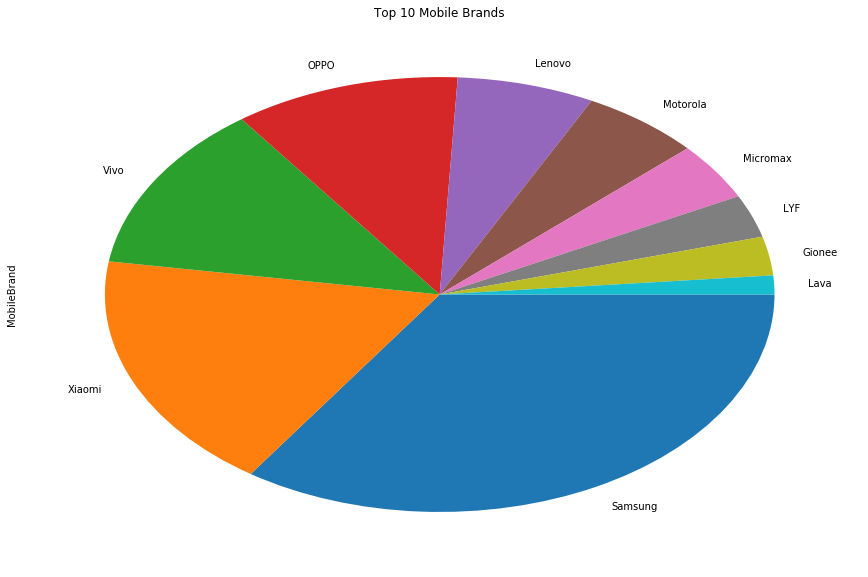

In [28]:
#pie chart of top 10 mobilebrand names in the data set

chrt = TopBrands.plot(kind='pie', figsize=[15, 10])
chrt.invert_yaxis()
chrt.set_title('Top 10 Mobile Brands')
plt.show()

In [29]:
#Samsung is dominating in dataset, with more than 2000 records in the data set. 
#The other Mobile Brands trail off behind it. The other Brands are Xiaomi,Vivo,Oppo Lenovo,Motorola,Micromax,LYF,Gionee and Lava

In [30]:
#now to visualize the data set by date and time. As the data has timestamp in it we can take hours, and week day to visualize

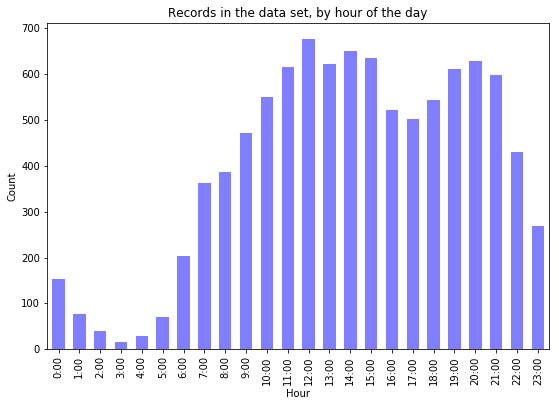

In [31]:
data['time_hour'] = data.Timestamp.apply(lambda x: x.hour)
countdata = data.groupby(data.time_hour).size()
countdata.index = [s + ':00' for s in countdata.index.astype(str)]
chrt = countdata.plot(kind='bar', figsize=[9, 6], width=0.6, alpha=0.5, color='b')
chrt.set_title('Records in the data set, by hour of the day')
chrt.set_xlabel('Hour')
chrt.set_ylabel('Count')
plt.show()

In [32]:
#The plot shows normal distribution as the first open time continuously increases from early morning and takes a dip at 5PM and again increases to take a dip at 3AM  

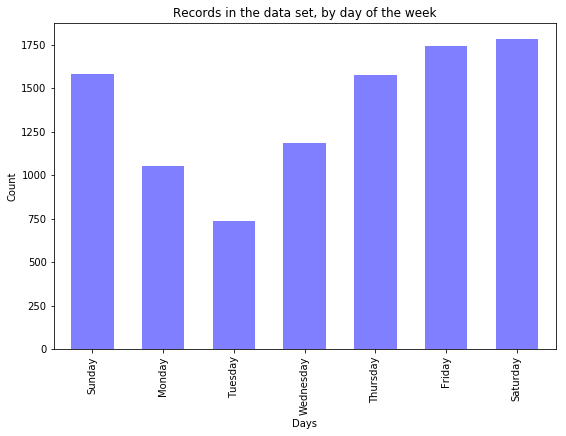

In [33]:
#volume vary by day of the week?
data['Weekday'] = data.Timestamp.apply(lambda x: x.weekday())
countdata = data.groupby(data.Weekday).size()
countdata.index = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
axs = countdata.plot(kind='bar',figsize=[9, 6],width=0.6,alpha=0.5,color='b')
axs.set_title('Records in the data set, by day of the week')
axs.set_xlabel('Days')
axs.set_ylabel('Count')
plt.show()

In [34]:
#Tuesday has by far the fewest observations in the data set followed by Monday and Wednesday. Tuesday has almost half of the day observation compared with top 4 days.

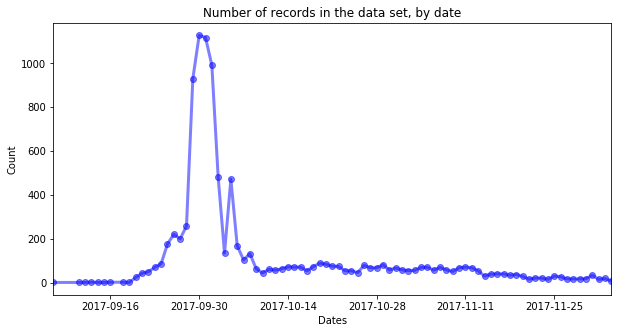

In [35]:
#Now, plot the number of observations by date. The dataset set was of more than 2 months 
data['Date'] = data['Timestamp'].apply(lambda x: x.date())
countdata = data.groupby(data.Date).size()
countdata=countdata[3:]
ax = countdata.plot(kind='line', figsize=[10, 5], linewidth='3', alpha=0.5, marker='o', color='b')
ax.set_title('Number of records in the data set, by date')
ax.set_xlabel('Dates')
ax.set_ylabel('Count')
plt.show()

In [36]:
#The line chart above shows no fluctuations in the number of observations by date. 
#But at particular about 15 days it showed exponential growth and at particular 30th September it got highest peak value of more than 1000 points which is uncanny as on other days it was below 200.

In [37]:
# Brand Model charts showing top 10 model for particular Brand using Plotly
# Creating a function for different brand mobiles models
#taking top 10 models observed for each Brand mobile

In [38]:
#loading libraries of plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [39]:
def mypl(brand):
    Models=data[data.MobileBrand==brand].BrandModel.value_counts()[:10]
    Models=pd.DataFrame(Models)
    check=Models.reset_index(inplace=True)
    Models = Models.rename(columns={'index': 'Model'})
    plotly.tools.set_credentials_file(username='username', api_key='API KEY')
    grp = [go.Bar(
            x=Models.Model,
            y=Models.BrandModel,
    )]
    return grp

In [40]:
py.iplot(mypl('Samsung'), filename='Top 10 Models')
#we can pass any Mobile Brand name as argument to mypl function and get top 10 models for that Brand